<a href="https://colab.research.google.com/github/brainhack-uiowa/python-novice-inflammation-colab/blob/master/10_Python_Data_Analysis_with_Pandas_and_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# setup
!wget https://github.com/ourcodingclub/CC-python-pandas-matplotlib/archive/master.zip

!unzip -jn master.zip

--2020-06-29 14:44:48--  https://github.com/ourcodingclub/CC-python-pandas-matplotlib/archive/master.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ourcodingclub/CC-python-pandas-matplotlib/zip/master [following]
--2020-06-29 14:44:48--  https://codeload.github.com/ourcodingclub/CC-python-pandas-matplotlib/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.1’

master.zip.1            [ <=>                ]   7.77K  --.-KB/s    in 0s      

2020-06-29 14:44:49 (77.9 MB/s) - ‘master.zip.1’ saved [7960]

Archive:  master.zip
41c2273e26e687ccab9ce6cd9525b22f657cc440


In [2]:
import glob

print(glob.glob('*'))

['README.md', 'scottish_hills.csv', 'master.zip.1', 'master.zip', 'sample_data']


#Python Data Analysis with Pandas and Matplotlib: Create plots and manipulate data with Pandas and Matplotlib
Welcome to this tutorial about data analysis with Python and the Pandas library. If you did the [Introduction to Python tutorial](https://ourcodingclub.github.io/tutorials/python-intro/index.html), you’ll rememember we briefly looked at the `pandas` package as a way of quickly loading a `.csv` file to extract some data. This tutorial looks at `pandas` and the plotting package `matplotlib` in some more depth.


#Tutorial aims:
1.   [Understand what Pandas is](https://colab.research.google.com/drive/1HMVQvR-_f9y3FulzGIyT1azmL14qOs71#scrollTo=dJHjYjBw-qPr&line=23&uniqifier=1)
2.   Ways of running Python and Pandas
3.   Understanding the basic Pandas data structures
4. Learn how to access data from a Pandas DataFrame
5. Learn how to filter data in a Pandas DataFrame
6.  Learn how to read and sort data from a file
7.  Understand the basics of the Matplotlib plotting package
8.   Learn how to bring together other packages to enhance your plots
9.    Learn how to further customise the appearance of Matplotlib plots
10.    Be inspired to experiment further with Matplotlib!


#1. What is Pandas?

`pandas` is a package commonly used to deal with data analysis. It simplifies the loading of data from external sources such as text files and databases, as well as providing ways of analysing and manipulating data once it is loaded into your computer. The features provided in `pandas` automate and simplify a lot of the common tasks that would take many lines of code to write in the basic Python langauge.

*If you have used R’s dataframes before, or the `numpy` package in Python, you may find some similarities in the Python pandas package. But if not, don’t worry because this tutorial doesn’t assume any knowledge of NumPy or R, only basic-level Python.*

Pandas is a hugely popular, and still growing, Python library used across a range of disciplines from environmental and climate science, through to social science, linguistics, biology, as well as a number of applications in industry such as data analytics, financial trading, and many others. In the [Introduction to Python tutorial](https://ourcodingclub.github.io/tutorials/python-intro/index.html) we had a look at how Python had grown rapidly in terms of users over the last decade or so, based on traffic to the [StackOverflow](https://stackoverflow.com/) question and answer site. A similar graph has been produced showing the growth of Pandas compared to some other Python software libraries! (Based on StackOverflow question views per month).

![alt text](https://ourcodingclub.github.io/assets/img/tutorials/pandas-python-intro/python-pandas-growth.png)

These graphs of course should be taken with a pinch of salt, as there is no agreed way of absolutely determing programming langauge and library popularity, but they are interesting to think about nonetheless.

Pandas is best suited for structured, **labelled** data, in other words, tabular data, that has headings associated with each column of data. The [official Pandas website](https://pandas.pydata.org/) describes Pandas’ data-handling strengths as:
*   Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet.
*   Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels.
* Any other form of observational / statistical data sets. The data actually need not be labelled at all to be placed into a `pandas` data structure.

Some other important points to note about Pandas are:
* Pandas is **fast**. Python sometimes gets a bad rap for being a bit slow compared to ‘compiled’ languages such as C and Fortran. But deep down in the internals of Pandas, it is actually written in C, and so processing large datasets is no problem for Pandas.
* Pandas is a dependency of another library called `statsmodels`, making it an important part of the statistical computing ecosystem in Python.

You can read more about the Pandas package at the [Pandas project website](https://pandas.pydata.org/).

# 2. Working with Pandas

There are several conventions to follow when working with pandas,
- Use import `pandas` as `pd` to give a library a short alias while importing it.
- Then refer to items in the library using that shortened name.

##Conventions when using Pandas

All the examples in this tutorial assume you have installed the Python library `pandas`, either through installing a scientific Python distribution such as Anaconda, or by installing it using a package-manager, such as `conda` or `pip`. To use any of the features of Pandas, you will need to have an `import` statement at the top of your script like so:

In [3]:
import pandas as pd

By convention, the `pandas` module is almost always imported this way as `pd`. Every time we use a `pandas` feature thereafter, we can shorten what we type by just typing `pd`, such as `pd.some_function()`.


Try the following to see which version of Pandas you are running:

In [4]:
import pandas as pd

print(pd.__version__)

1.0.5


Run the code and note the output. 

##Files for this tutorial

This short tutorial is mainly based around working with the basic Pandas commands and data structures, but we also use some data about Scottish mountains, provided in the form of a `.csv` file (`scottish_hills.csv`).

The original data came from a series of databases about the mountains of Scotland, which if you are interested further can be found here: http://www.haroldstreet.org.uk/other/excel-csv-files/.

*As a side note, and some interesting trivia, the dataset we are using was originally compiled in **1891** by Sir Hugh Munro. He compiled a list of all the mountains in Scotland above 3000 feet (914m if you prefer the metric system). The table has been revised since with more accurate heights and coordinates.*

# 3. Understand the basic Pandas data structures

Pandas has two core data structures used to store data: The *Series* and the *DataFrame*.

##Series

The series is a one-dimensional array-like structure ([remember numpy?](https://swcarpentry.github.io/python-novice-inflammation/02-numpy/index.html)) designed to hold a single array (or ‘column’) of data and an associated array of data labels, called an *index*. We can create a series to experiment with by simply passing a list of data, let’s use numbers in this example:

In [5]:
import pandas as pd

my_series = pd.Series([4.6, 2.1, -4.0, 3.0])
print(my_series)

0    4.6
1    2.1
2   -4.0
3    3.0
dtype: float64


Note that printing out our Series object prints out the values and the index numbers. If we just wanted the values, we can add to our script the following line:

In [6]:
print(my_series.values)

[ 4.6  2.1 -4.   3. ]


For a lot of applications, a plain old *Series* is probably not a lot of use, but it is the core component of the Pandas workhorse, the *DataFrame*, so it’s useful to know about.

##DataFrames

The DataFrame represents tabular data, a bit like a spreadsheet. DataFrames are organised into colums (each of which is a *Series*), and each column can store a single data-type, such as floating point numbers, strings, boolean values etc. DataFrames can be indexed by either their row or column names. (They are similar in many ways to R’s `data.frame`.)

We can create a DataFrame in Pandas from a Python dictionary, or by loading in a text file containing tabular data. First we are going to look at how to create one from a dictionary.

##A refresher on the Dictionary data type

Dictionaries are a core Python data structure that contain a set of `key:value` pairs. If you imagine having a written language dictionary, say for English-Hungarian, and you wanted to know the Hungarian word for “spaceship”, you would look-up the English word (the dictionary `key` in Python) and the dictionary would give you the Hungarian translation (the dictionary `value` in Python). So the “key-value pair” would be `'spaceship': 'űrhajó'`.

To construct a dictionary in Python, the syntax we would write is:

In [7]:
# Note that dictionaries are part of the core Python language
# You do not need 'import pandas' if you are only working with dictionaries.

hungarian_dictionary = {'spaceship': 'űrhajó'}


We could then look-up items in our dictionary with this syntax:

In [8]:
hungarian_dictionary['spaceship']

'űrhajó'

Dictionaries can have multiple entries (multiple key-value pairs), and these are separated with a comma:

In [9]:
hungarian_dictionary = {'spaceship': 'űrhajó',
                        'watermelon': 'görögdinnye',
                        'bicycle': 'kerékpár'}

The `values` in dictionaries are not limited to single strings or words. Values can be any Python object such as numbers, lists, tuples, or even other dictionaries:

In [10]:
# Names (keys) mapped to a tuple (the value) containing the height, lat and longitude.
scottish_hills = {'Ben Nevis': (1345, 56.79685, -5.003508),
                  'Ben Macdui': (1309, 57.070453, -3.668262),
                  'Braeriach': (1296, 57.078628, -3.728024),
                  'Cairn Toul': (1291, 57.054611, -3.71042),
                  'Sgòr an Lochain Uaine': (1258, 57.057999, -3.725416)}

Looking up a Scottish mountain using its name as the key would then give us the height, latitude and longitude as the value returned.

In [11]:
scottish_hills['Braeriach']

(1296, 57.078628, -3.728024)

Enclosed in a print function, i.e. `print(scottish_hills['Braeriach']`, this would print out:

In [12]:
print(scottish_hills['Braeriach'])

(1296, 57.078628, -3.728024)


##Back to DataFrames…

If we didn’t have any real data to play with from an external file, we could manually create a DataFrame from a Python dictionary. Using the `scottish_hills` dictionary above, we can load it into a Pandas DataFrame with this syntax:
```
dataframe = pd.DataFrame(scottish_hills)
```

**Note**: You will sometimes see `df` used as shorthand convention for a `DataFrame` object in many Pandas examples, such as in the official Pandas documentation and on StackOverflow. (I have used dataframe for readability here.)

Try creating a Python script that converts a Python dictionary into a Pandas DataFrame, then print the DataFrame to screen. You can use the `scottish_hills` example or experiment with your own.

In [13]:
scottish_hills = {'Ben Nevis': (1345, 56.79685, -5.003508),
                  'Ben Macdui': (1309, 57.070453, -3.668262),
                  'Braeriach': (1296, 57.078628, -3.728024),
                  'Cairn Toul': (1291, 57.054611, -3.71042),
                  'Sgòr an Lochain Uaine': (1258, 57.057999, -3.725416)}

dataframe = pd.DataFrame(scottish_hills)
print(dataframe)

     Ben Nevis   Ben Macdui    Braeriach   Cairn Toul  Sgòr an Lochain Uaine
0  1345.000000  1309.000000  1296.000000  1291.000000            1258.000000
1    56.796850    57.070453    57.078628    57.054611              57.057999
2    -5.003508    -3.668262    -3.728024    -3.710420              -3.725416


Now, this is not necessarily the most logical order to store data. It would probably make more sense for the columns to be categories or types of data, rather than the names of each hill. You may remember from previous workshops that the data is currently in `wide` format, but we want it in `long` format. To do this, we need to think about how to structure our dictionary. Pandas works best with dictionaries when the dictionary keys refer to column names or headers. Here’s a better dictionary to use:

In [14]:
scottish_hills = {'Hill Name': ['Ben Nevis', 'Ben Macdui', 'Braeriach', 'Cairn Toul', 'Sgòr an Lochain Uaine'],
                  'Height': [1345, 1309, 1296, 1291, 1258],
                  'Latitude': [56.79685, 57.070453, 57.078628, 57.054611, 57.057999],
                  'Longitude': [-5.003508, -3.668262, -3.728024, -3.71042, -3.725416]}

We’ve made the dictionary keys into category-like names, and then these are followed by a list of corresponding data values. Pandas will be able to read this better. Replace the dictionary in your script above and run it again. Now you should get the following output:

In [15]:
scottish_hills

{'Height': [1345, 1309, 1296, 1291, 1258],
 'Hill Name': ['Ben Nevis',
  'Ben Macdui',
  'Braeriach',
  'Cairn Toul',
  'Sgòr an Lochain Uaine'],
 'Latitude': [56.79685, 57.070453, 57.078628, 57.054611, 57.057999],
 'Longitude': [-5.003508, -3.668262, -3.728024, -3.71042, -3.725416]}

This is a more useful layout for our DataFrame. The column names are ordered alphabetically by default (left to right), but we can specify the order using the `columns` keyword. (Another way would be to use an `OrderedDict` data structure, but that’s not covered in this tutorial…)

In your original script, replace the line where you create the DataFrame with the following:

In [16]:
dataframe = pd.DataFrame(scottish_hills)

Run the modified script. You should now get output that looks like this:

In [17]:
dataframe

,Hill Name,Height,Latitude,Longitude
0,Ben Nevis,1345,56.796850,-5.003508
1,Ben Macdui,1309,57.070453,-3.668262
2,Braeriach,1296,57.078628,-3.728024
3,Cairn Toul,1291,57.054611,-3.710420
4,Sgòr an Lochain Uaine,1258,57.057999,-3.725416


Note how the dictionary keys have become column headers running along the top, and as with the Series, an index number has been automatically generated.

#4. Learn how to access data from a Pandas DataFrame (Review)

Pandas DataFrames have many useful methods that can be used to inspect the data and manipulate it. We are going to have a look at just a few of them.

If our DataFrame was huge, we would not want to print all of it to screen, instead we could have a look at the first `n` items with the `head` method, which takes the number of rows you want to view as its argument. If we added this to the end of our script and ran it again, it would print:

In [18]:
dataframe.head(3)

,Hill Name,Height,Latitude,Longitude
0,Ben Nevis,1345,56.796850,-5.003508
1,Ben Macdui,1309,57.070453,-3.668262
2,Braeriach,1296,57.078628,-3.728024


We could also look at the last `n` rows with the `tail` method, which would give us:

In [19]:
dataframe.tail(2)

,Hill Name,Height,Latitude,Longitude
3,Cairn Toul,1291,57.054611,-3.710420
4,Sgòr an Lochain Uaine,1258,57.057999,-3.725416


Our columns in the `dataframe` object are individual Series of data. We can access them by referring to the column name e.g. `dataframe['column-name']`. Have a go at adding these extra statements to your script, and check that you get the same output:

In [20]:
dataframe['Hill Name']

0                Ben Nevis
1               Ben Macdui
2                Braeriach
3               Cairn Toul
4    Sgòr an Lochain Uaine
Name: Hill Name, dtype: object

And:

In [21]:
dataframe['Height']

0    1345
1    1309
2    1296
3    1291
4    1258
Name: Height, dtype: int64

Note that Pandas DataFrames are accessed *primarily by columns*. In a sense the row is less important to a DataFrame. For example, what do you think would happen using the following code?

In [22]:
dataframe[0]

KeyError: ignored

Ouch! That’s a lot of error messages… **The columns cannot be accessed by their index number in this way**, you must use the column name. You may have thought that this might return the row index instead, but we have to use a different method to get the row:

In [23]:
dataframe.iloc[0]

Hill Name    Ben Nevis
Height            1345
Latitude       56.7968
Longitude     -5.00351
Name: 0, dtype: object

The `iloc` method gives us access to the DataFrame in more traditional ‘matrix’ style notation, i.e. `[row, column]` notation. So if we wanted to get the height of Ben Nevis specifically, we could do:

In [24]:
dataframe.iloc[0,0]

'Ben Nevis'

A way to remeber this is that `iloc` is short for “integer location”. But if we cannot count on the 0th column always being "Hill Name", we can explicitly 
reference the "Hill Name" column using the `.loc` method. 

In [25]:
dataframe.loc[0, 'Hill Name']

'Ben Nevis'

#5. Learn how to filter data in a Pandas DataFrame

We can also apply conditions to the data we are inspecting, such as to filter our data.

In [26]:
dataframe["Height"] > 1300

0     True
1     True
2    False
3    False
4    False
Name: Height, dtype: bool

This returns a new Series of True/False values though. To actually filter the data, we need to use this Series to mask our original DataFrame:

In [27]:
dataframe[dataframe["Height"] > 1300]

,Hill Name,Height,Latitude,Longitude
0,Ben Nevis,1345,56.796850,-5.003508
1,Ben Macdui,1309,57.070453,-3.668262


##Learn how to append data to an existing DataFrame

We can also append data to the DataFrame. This is done using the following syntax:

In [28]:
dataframe['Region'] = ['Grampian', 'Cairngorm', 'Cairngorm', 'Cairngorm', 'Cairngorm']

Using the original script, try adding this line to the end of the script to append the Regions data and then printing the DataFrame again. *If you are following the tutorial by building up a script as you go along, it should now look like this:*

In [29]:
scottish_hills = {'Hill Name': ['Ben Nevis', 'Ben Macdui', 'Braeriach', 'Cairn Toul', 'Sgòr an Lochain Uaine'],
                  'Height': [1345, 1309, 1296, 1291, 1258],
                  'Latitude': [56.79685, 57.070453, 57.078628, 57.054611, 57.057999],
                  'Longitude': [-5.003508, -3.668262, -3.728024, -3.71042, -3.725416]}

dataframe = pd.DataFrame(scottish_hills, columns=['Hill Name', 'Height', 'Latitude', 'Longitude'])
dataframe['Region'] = ['Grampian', 'Cairngorm', 'Cairngorm', 'Cairngorm', 'Cairngorm']
print(dataframe)

               Hill Name  Height   Latitude  Longitude     Region
0              Ben Nevis    1345  56.796850  -5.003508   Grampian
1             Ben Macdui    1309  57.070453  -3.668262  Cairngorm
2              Braeriach    1296  57.078628  -3.728024  Cairngorm
3             Cairn Toul    1291  57.054611  -3.710420  Cairngorm
4  Sgòr an Lochain Uaine    1258  57.057999  -3.725416  Cairngorm


#6. Learn how to read data from a file using Pandas

So far we have only created data in Python itself, but Pandas has built in tools for reading data from a variety of external data formats, including Excel spreadsheets, raw text and `.csv` files. It can also interface with databases such as MySQL, but we are not going to cover databases in this tutorial.

We’ve provided the `scottish_hills.csv` file [in this Github repository](https://github.com/ourcodingclub/CC-python-pandas-matplotlib). The file contains all the mountains above 3000 feet (about 914 metres) in Scotland. We can load this easily into a DataFrame with the `read_csv` function.

If you are writing a complete script to follow the tutorial, create a new file and enter:

In [30]:
dataframe = pd.read_csv("scottish_hills.csv")
dataframe.head(10)

,Hill Name,Height,Latitude,Longitude,Osgrid
0,A' Bhuidheanach Bheag,936.0,56.870342,-4.199001,NN660775
1,A' Chailleach,997.0,57.693800,-5.128715,NH136714
2,A' Chailleach,929.2,57.109564,-4.179285,NH681041
3,A' Chraileag (A' Chralaig),1120.0,57.184186,-5.154837,NH094147
4,A' Ghlas-bheinn,918.0,57.255090,-5.303687,NH008231
5,A' Mhaighdean,967.0,57.719644,-5.346720,NH007749
6,A' Mharconaich,973.2,56.857002,-4.290668,NN604762
7,Am Basteir,934.0,57.247931,-6.202982,NG465253
8,Am Bodach,1031.8,56.741727,-4.983393,NN176650
9,Am Faochagach,953.0,57.771801,-4.853899,NH303793


We’ve used the `head()` function to give us only the first 10 items in the DataFrame, and avoid printing all 282 hills out to screen…

It looks like this table contains the hills in alphabetical order. It would be nice to see them in order of height. We can sort the DataFrame using the `sort_values` method. You can add the following lines to your script:

In [31]:
sorted_hills_dataframe = dataframe.sort_values(by=['Height'], ascending=False)

# Let's have a look at the top 5 to check
sorted_hills_dataframe.head(5)

,Hill Name,Height,Latitude,Longitude,Osgrid
92,Ben Nevis,1344.5,56.796891,-5.003675,NN166712
88,Ben Macdui (Beinn Macduibh),1309.0,57.070368,-3.669099,NN988989
104,Braeriach,1296.0,57.078298,-3.728389,NN953999
115,Cairn Toul,1291.0,57.054397,-3.710773,NN963972
212,Sgor an Lochain Uaine,1258.0,57.058369,-3.725797,NN954976


We now have our hills sorted by height. Note how we’ve used the `by=['Height']` argument to specify that we want to sort by height, and then the `ascending=False` argument to get the heights sorted in descending order, from highest to lowest.

#7. Understand the basics of the Matplotlib plotting package (Review)

`matplotlib` is a Python package used for data plotting and visualisation. It is a useful complement to Pandas, and like Pandas, is a very feature-rich library which can produce a large variety of plots, charts, maps, and other visualisations. It would be impossible to cover the entirety of Matplotlib in one tutorial, so this section is really to give you a flavour of the capabilities of Matplotlib, and to cover some of the basics, as well as a couple of more interesting ‘advanced’ features.

If you have a bit of basic Python knowledge already, the common route to learning Matplotib is to find examples of plots similar to ones you are trying to create and walk through them, trying to reproduce them with your own data perhaps. A great starting point is the [Matplotlib gallery of examples](https://matplotlib.org/gallery.html). I recommend this because in practice it is difficult to cover each and every plot type, as the needs of scientists differ considerably depending on the type of data they are working with or the message they are trying to convey in their visualisation. You might also find it useful to refer to the [Matplotlib official documentation](https://matplotlib.org/api/pyplot_api.html) as you go along.


##Matplotlib conventions

Like Pandas, Matplotlib has a few conventions that you will see in the examples, and in resources on other websites such as StackOverflow. Typically, if we are going to work on some plotting, we would import `matplotlib` like this:

In [32]:
import matplotlib.pyplot as plt

And thereafter, we could access the most commonly used features of Matplotlib with `plt` as shorthand. Note that this `import` statement is at the *submodule* level. We are not importing the full `matplotlib` module, but a subset of it called `pyplot`. Pyplot contains the most useful features of Matplotlib with an interface that makes interactive-style plotting easier. Submodule imports have the form `import module.submodule` and you will see them used in other Python libraries too sometimes.

##Matplotlib basics

We’re going to use the Scottish hill data from the Pandas section of the tutorial, so if you need to set this up again, the script should look like this to begin with:

Let’s have a look at the relationship between two varibles in our Scottish hills data. Suppose I have a hypothesis that the height of Scottish hill increases with latitude northwards. Were going to plot height against latitude. To save typing later on, we can extract the Series for “Height” and “Latitude” by assigning each to a new variable, `x` and `y`, respectively.

(This saves us having to type `dataframe.Height` etc. every time)

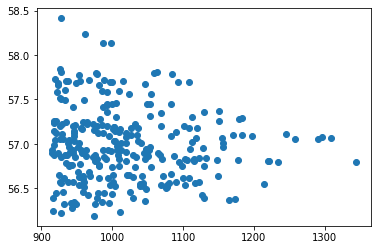

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("scottish_hills.csv")
x = dataframe["Height"]
y = dataframe["Latitude"]

# pythonic style (preferred)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)

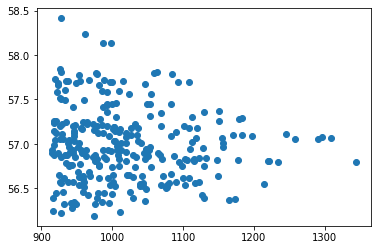

In [34]:
# matlab style (not preferred)
plt.scatter(x, y)

We demonstrated two styles of plotting with matplotlib: "pythonic" and "matlab".
While the pythonic style is more verbose (i.e., more lines of code), it gives you more control over your plotting in case you needed to add another subplot (axis) to your figure. The matlab style does not have a straightforward method to create and modify several subplots (axes).

The matlab style was created back in 2003 when matlab was still the dominant programming language.

#8. Learn how to bring together other Python libraries with Matplotlib

Now we are going to do some basic statistics so we can plot a line of linear regression on our chart. I’m a software engineer, not a statistician, so this will be pretty basic…

Let’s plot a linear regression through the data. Python has a library called `scipy` that contains a lot of statistics routines. We can import it by adding to the top of our script:

In [35]:
from scipy.stats import linregress

Then at the bottom of our script, we are going to get statistics for the linear regression by using a function called `linregress` by adding the following line. Don’t worry, we will go through below how all of this works. These are the lines you need to add to the end of your script:

In [36]:
stats = linregress(x, y)

m = stats.slope
b = stats.intercept

Let’s pause and recap what we’ve done here before plotting the regression.

1.    We used an `import` statement with a slightly different format here: `from module.submodule import function`. This is a handy way of importing just a single function from a Python module. In this case we only want to use the `linregress` function in SciPy’s `stats` submodule, so we can just import it without anything else using that syntax.
2.    Next we are assigning the results of `linregress` to variable called `stats`.
3.    The `linregress` function is slightly different to the functions we’ve seen so far, because it returns an object with multiple values. In fact it returns the `slope`, `intercept`, `rvalue`, `pvalue`, and `stderr` (standard error). We can get hold of each of these values by using the dot notation: e.g. `stats.slope`, for example, much in the same way we can access our DataFrame attributes with `dataframe.Height`.
4.    For ease of typing later, we’ve assigned the `stats.slope` to a variable `m`, and `stats.intercept` to a variable `b`.

The equation for the straight line that describes linear regression is `y = mx + b`, where `m` is the slope and `b` is the intercept.

Therefore, we can then plot the line of linear regression by adding the following line:

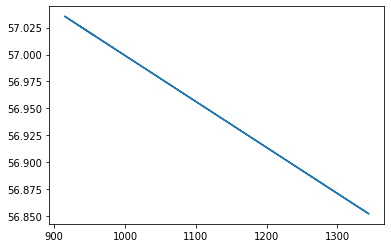

In [37]:
# pythonic style (preferred)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, m * x + b) # The equation of the straight line.

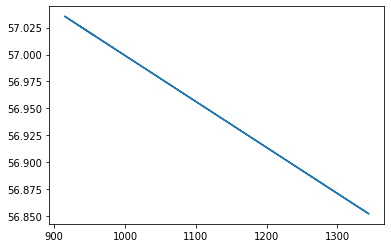

In [38]:
# matlab style
plt.plot(x, m * x + b)  # The equation of the straight line.

That’s a lot of new Python, so let’s review what the final script should look like:

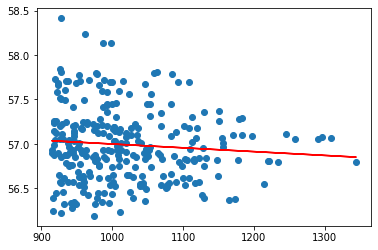

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

dataframe = pd.read_csv("scottish_hills.csv")

x = dataframe.Height
y = dataframe.Latitude

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
ax.plot(x, m * x + b, color="red")   # I've added a color argument here

#9. Learn how to customise Matplotlib plots further

Matplotlib figures are highly customisable, and there are so many options it is usually best to consult the [documentation first](https://matplotlib.org/tutorials/index.html). In addition, the [Matplotlib official pyplot tutorial is quite useful](https://matplotlib.org/users/pyplot_tutorial.html). To get started on Matplotlib plot customisation, here is an extended version of the above which sets the font sizes, axes lables, linewidths, and marker types:

Again, the best way to learn the features of Matplotlib is by example, so try to modify your script above with some of the extra arguments added below, such as `fontsize`, `linewidth`, `color`, etc. Have a go at adding your own values, and producing nicer looking plots. Here’s my example to start you off:

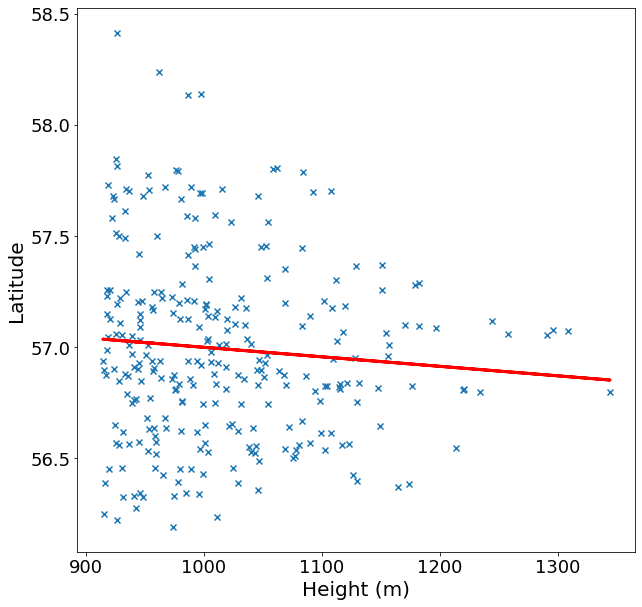

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

dataframe = pd.read_csv("scottish_hills.csv")

x = dataframe.Height
y = dataframe.Latitude

stats = linregress(x, y)

m = stats.slope
b = stats.intercept


# Change the default figure size
fig = plt.figure(figsize=(10,10))

# create a subplot (axis)
ax = fig.add_subplot(1, 1, 1)

# Change the default marker for the scatter from circles to x's
ax.scatter(x, y, marker='x')

# Set the linewidth on the regression line to 3px
ax.plot(x, m * x + b, color="red", linewidth=3)

# Add x and y lables, and set their font size
ax.set_xlabel("Height (m)", fontsize=20)
ax.set_ylabel("Latitude", fontsize=20)

# Set the font size of the number lables on the axes
ax.tick_params(labelsize=18)


#Summary

In this tutorial we have covered the various ways in which we can use Pandas, Matplotlib, and a few other Python libraries to start doing data analysis.

#Tutorial outcomes

1.    Understood what the Pandas library does
2.    Understood the basic Pandas data structures and how to manipulate them.
3.    Understood the basics of the Matplotlib plotting package
4.    Learnt how to bring use additional packages to enhance your plots
